# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
        
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather= requests.get( city_url).json()
        print(json.dumps(city_weather,indent=4, sort_keys=True))
       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
		
		# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



        
    
              

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | abu kamal
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 34.4506,
        "lon": 40.9171
    },
    "dt": 1667640260,
    "id": 174448,
    "main": {
        "feels_like": 296.73,
        "grnd_level": 996,
        "humidity": 22,
        "pressure": 1017,
        "sea_level": 1017,
        "temp": 297.65,
        "temp_max": 297.65,
        "temp_min": 297.65
    },
    "name": "Abu Kamal",
    "sys": {
        "country": "SY",
        "sunrise": 1667619593,
        "sunset": 1667657995
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 111,
        "gust": 1.67,
        "speed": 1.24
    }
}
Processing Record 2 of Set 1 | hobart
{
    "base

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 58.3089,
        "lon": 48.348
    },
    "dt": 1667640274,
    "id": 543737,
    "main": {
        "feels_like": 270.76,
        "grnd_level": 1008,
        "humidity": 86,
        "pressure": 1021,
        "sea_level": 1021,
        "temp": 273.44,
        "temp_max": 273.44,
        "temp_min": 273.44
    },
    "name": "Kotel'nich",
    "sys": {
        "country": "RU",
        "sunrise": 1667621433,
        "sunset": 1667652587
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 348,
        "gust": 3.32,
        "speed": 2.23
    }
}
Processing Record 12 of Set 1 | thompson
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {


{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 23 of Set 1 | jos
{
    "base": "stations",
    "clouds": {
        "all": 39
    },
    "cod": 200,
    "coord": {
        "lat": 9.9167,
        "lon": 8.9
    },
    "dt": 1667640291,
    "id": 2335953,
    "main": {
        "feels_like": 296.65,
        "grnd_level": 888,
        "humidity": 25,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 297.51,
        "temp_max": 297.51,
        "temp_min": 297.51
    },
    "name": "Jos",
    "sys": {
        "country": "NG",
        "sunrise": 1667625342,
        "sunset": 1667667615
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 64,
        "gust": 6.02,
        "speed": 4.25
    }
}
Processing Record 24 of Set 1 | ta

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -20.8968,
        "lon": 55.5496
    },
    "dt": 1667640304,
    "id": 935255,
    "main": {
        "feels_like": 303.49,
        "humidity": 72,
        "pressure": 1018,
        "temp": 300.85,
        "temp_max": 301.22,
        "temp_min": 299.24
    },
    "name": "Sainte-Marie",
    "sys": {
        "country": "RE",
        "id": 2133,
        "sunrise": 1667611989,
        "sunset": 1667658575,
        "type": 1
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 3.6
    }
}
Processing Record 34 of Set 1 | bambous virieux
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -20.3428,
        "l

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -53.15,
        "lon": -70.9167
    },
    "dt": 1667640145,
    "id": 3874787,
    "main": {
        "feels_like": 280.03,
        "humidity": 81,
        "pressure": 1012,
        "temp": 281.21,
        "temp_max": 281.21,
        "temp_min": 280.99
    },
    "name": "Punta Arenas",
    "sys": {
        "country": "CL",
        "id": 8487,
        "sunrise": 1667638367,
        "sunset": 1667692903,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 2.06
    }
}
Processing Record 44 of Set 1 | karratha
{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
        "lat": -20.7377,
        "lon": 116

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 57.0531,
        "lon": -135.33
    },
    "dt": 1667640333,
    "id": 5557293,
    "main": {
        "feels_like": 274.09,
        "humidity": 86,
        "pressure": 996,
        "temp": 274.09,
        "temp_max": 274.09,
        "temp_min": 274.09
    },
    "name": "Sitka",
    "sys": {
        "country": "US",
        "id": 7795,
        "sunrise": 1667665276,
        "sunset": 1667696913,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 0
    }
}
Processing Record 4 of Set 2 | port alfred
{
    "base": "stations",
    "clouds": {
        "all": 18
    },
    "cod": 200,
    "coord": {
        "lat": -33.5906,
        "lon": 26.891


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 12.15,
        "lon": -68.2667
    },
    "dt": 1667640348,
    "id": 3513563,
    "main": {
        "feels_like": 302.33,
        "humidity": 74,
        "pressure": 1008,
        "temp": 300.14,
        "temp_max": 300.14,
        "temp_min": 300.14
    },
    "name": "Kralendijk",
    "sys": {
        "country": "BQ",
        "id": 8794,
        "sunrise": 1667644020,
        "sunset": 1667685977,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 170,
        "speed": 4.12
    }
}
Processing Record 14 of Set 2 | acapulco
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 16.8634,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 65.6145,
        "lon": -37.6368
    },
    "dt": 1667640362,
    "id": 3424607,
    "main": {
        "feels_like": 269.25,
        "grnd_level": 1001,
        "humidity": 97,
        "pressure": 1006,
        "sea_level": 1006,
        "temp": 274.24,
        "temp_max": 274.24,
        "temp_min": 274.24
    },
    "name": "Tasiilaq",
    "snow": {
        "1h": 1.21
    },
    "sys": {
        "country": "GL",
        "id": 81,
        "sunrise": 1667644610,
        "sunset": 1667670685,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 189,
    "weather": [
        {
            "description": "snow",
            "icon": "13n",
            "id": 601,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 42,
        "gust": 10.53,
        "speed": 5.66
    }
}
Processing Record 25 of Set 2 | faya
{
    "base": "stations",
    "clouds"

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 35.1333,
        "lon": 140.3
    },
    "dt": 1667640377,
    "id": 2112309,
    "main": {
        "feels_like": 287.96,
        "grnd_level": 1019,
        "humidity": 76,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 288.4,
        "temp_max": 288.4,
        "temp_min": 288.4
    },
    "name": "Katsuura",
    "sys": {
        "country": "JP",
        "sunrise": 1667595792,
        "sunset": 1667634091
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 51,
        "gust": 7.35,
        "speed": 6.16
    }
}
Processing Record 35 of Set 2 | linxia
{
    "base": "stations",
    "clouds": {
        "all": 36
    },
    "cod": 200,
    "coord": {
        

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": -0.9492,
        "lon": 100.3543
    },
    "dt": 1667640391,
    "id": 1633419,
    "main": {
        "feels_like": 302.23,
        "grnd_level": 1010,
        "humidity": 72,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 300.18,
        "temp_max": 300.18,
        "temp_min": 300.18
    },
    "name": "Padang",
    "sys": {
        "country": "ID",
        "id": 9423,
        "sunrise": 1667602658,
        "sunset": 1667646399,
        "type": 1
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 233,
        "gust": 1.38,
        "speed": 1.59
    }
}
Processing Record 45 of Set 2 | north bend
{
    "base": "stations",
    "clouds": {
        "all": 10

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 22.6833,
        "lon": 75.6167
    },
    "dt": 1667640406,
    "id": 1276400,
    "main": {
        "feels_like": 302.75,
        "humidity": 27,
        "pressure": 1017,
        "temp": 304.27,
        "temp_max": 304.27,
        "temp_min": 304.27
    },
    "name": "Betma",
    "sys": {
        "country": "IN",
        "id": 9067,
        "sunrise": 1667610248,
        "sunset": 1667650683,
        "type": 1
    },
    "timezone": 19800,
    "visibility": 6000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 2.06
    }
}
Processing Record 6 of Set 3 | waingapu
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -9.6567,
        "lon": 120.2641


{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 52.15,
        "lon": 56.1833
    },
    "dt": 1667640421,
    "id": 528521,
    "main": {
        "feels_like": 267.46,
        "grnd_level": 997,
        "humidity": 88,
        "pressure": 1020,
        "sea_level": 1020,
        "temp": 270.93,
        "temp_max": 270.93,
        "temp_min": 270.93
    },
    "name": "Matveyevka",
    "sys": {
        "country": "RU",
        "sunrise": 1667618228,
        "sunset": 1667652032
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 265,
        "gust": 2.87,
        "speed": 2.53
    }
}
Processing Record 17 of Set 3 | comodoro rivadavia
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coo

{
    "base": "stations",
    "clouds": {
        "all": 49
    },
    "cod": 200,
    "coord": {
        "lat": -45.4167,
        "lon": 167.7167
    },
    "dt": 1667640436,
    "id": 2181625,
    "main": {
        "feels_like": 279.13,
        "grnd_level": 1001,
        "humidity": 85,
        "pressure": 1028,
        "sea_level": 1028,
        "temp": 279.75,
        "temp_max": 279.75,
        "temp_min": 279.75
    },
    "name": "Te Anau",
    "sys": {
        "country": "NZ",
        "sunrise": 1667582526,
        "sunset": 1667634196
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 169,
        "gust": 3.4,
        "speed": 1.34
    }
}
Processing Record 28 of Set 3 | grand river south east
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Pr

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -21.2078,
        "lon": -159.775
    },
    "dt": 1667640452,
    "id": 4035715,
    "main": {
        "feels_like": 296.58,
        "humidity": 78,
        "pressure": 1014,
        "temp": 296.18,
        "temp_max": 296.18,
        "temp_min": 296.18
    },
    "name": "Avarua",
    "sys": {
        "country": "CK",
        "id": 7271,
        "sunrise": 1667577254,
        "sunset": 1667623864,
        "type": 1
    },
    "timezone": -36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 3.6
    }
}
Processing Record 40 of Set 3 | ewa beach
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 21.3156,
        "lon": -

{
    "base": "stations",
    "clouds": {
        "all": 44
    },
    "cod": 200,
    "coord": {
        "lat": -19.9842,
        "lon": 57.6142
    },
    "dt": 1667640468,
    "id": 934649,
    "main": {
        "feels_like": 299.52,
        "humidity": 68,
        "pressure": 1019,
        "temp": 299.52,
        "temp_max": 299.52,
        "temp_min": 299.52
    },
    "name": "Cap Malheureux",
    "sys": {
        "country": "MU",
        "id": 2002134,
        "sunrise": 1667611565,
        "sunset": 1667658008,
        "type": 2
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 50,
        "gust": 6.26,
        "speed": 4.02
    }
}
Processing Record 1 of Set 4 | vilhena
{
    "base": "stations",
    "clouds": {
        "all": 14
    },
    "cod": 200,
    "coord": {
        "l

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -13.7,
        "lon": -76.2167
    },
    "dt": 1667640481,
    "id": 3932145,
    "main": {
        "feels_like": 286.94,
        "humidity": 88,
        "pressure": 1015,
        "temp": 287.18,
        "temp_max": 288.16,
        "temp_min": 287.18
    },
    "name": "Pisco",
    "sys": {
        "country": "PE",
        "id": 8691,
        "sunrise": 1667644149,
        "sunset": 1667689665,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 0
    }
}
Processing Record 11 of Set 4 | kajaani
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 64.2273,
        "lon": 27.7285

{
    "base": "stations",
    "clouds": {
        "all": 7
    },
    "cod": 200,
    "coord": {
        "lat": 30.4833,
        "lon": -115.95
    },
    "dt": 1667640496,
    "id": 3984997,
    "main": {
        "feels_like": 287.31,
        "grnd_level": 1018,
        "humidity": 56,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 288.28,
        "temp_max": 288.28,
        "temp_min": 288.28
    },
    "name": "San Quint\u00edn",
    "sys": {
        "country": "MX",
        "sunrise": 1667656894,
        "sunset": 1667695992
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 19,
        "gust": 1.25,
        "speed": 0.71
    }
}
Processing Record 21 of Set 4 | powassan
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {


{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 18.4411,
        "lon": 1.4078
    },
    "dt": 1667640509,
    "id": 2455290,
    "main": {
        "feels_like": 300.19,
        "grnd_level": 965,
        "humidity": 13,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 301.72,
        "temp_max": 301.72,
        "temp_min": 301.72
    },
    "name": "Kidal",
    "sys": {
        "country": "ML",
        "sunrise": 1667627745,
        "sunset": 1667668808
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 81,
        "gust": 7.54,
        "speed": 6.64
    }
}
Processing Record 31 of Set 4 | laguna
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 38.421,

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": -2.4683,
        "lon": 28.8242
    },
    "dt": 1667640523,
    "id": 215605,
    "main": {
        "feels_like": 294.01,
        "grnd_level": 848,
        "humidity": 80,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 293.8,
        "temp_max": 293.8,
        "temp_min": 293.8
    },
    "name": "Kabare",
    "rain": {
        "1h": 0.76
    },
    "sys": {
        "country": "CD",
        "sunrise": 1667619723,
        "sunset": 1667663669
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 6,
        "gust": 1.81,
        "speed": 1.07
    }
}
Processing Record 41 of Set 4 | beringovskiy
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 86
    },
    "cod": 200,
    "coord": {
        "lat": 53.7841,
        "lon": 82.3116
    },
    "dt": 1667640536,
    "id": 1490551,
    "main": {
        "feels_like": 275.43,
        "grnd_level": 1002,
        "humidity": 48,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 278.6,
        "temp_max": 278.6,
        "temp_min": 278.6
    },
    "name": "Suzun",
    "sys": {
        "country": "RU",
        "sunrise": 1667612257,
        "sunset": 1667645461
    },
    "timezone": 25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 238,
        "gust": 8.35,
        "speed": 4.24
    }
}
Processing Record 0 of Set 5 | yar-sale
{
    "base": "stations",
    "clouds": {
        "all": 60
    },
    "cod": 200,
    "coord": {
        

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -33.918,
        "lon": 25.5701
    },
    "dt": 1667640550,
    "id": 964420,
    "main": {
        "feels_like": 295.62,
        "humidity": 78,
        "pressure": 1015,
        "temp": 295.31,
        "temp_max": 295.31,
        "temp_min": 295.31
    },
    "name": "Port Elizabeth",
    "sys": {
        "country": "ZA",
        "id": 1973,
        "sunrise": 1667618019,
        "sunset": 1667666935,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 210,
        "speed": 4.63
    }
}
Processing Record 10 of Set 5 | lakes entrance
{
    "base": "stations",
    "clouds": {
        "all": 58
    },
    "cod": 200,
    "coord": {
        "lat": -37.8811,
      

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": -33.9258,
        "lon": 18.4232
    },
    "dt": 1667640430,
    "id": 3369157,
    "main": {
        "feels_like": 293.93,
        "humidity": 67,
        "pressure": 1016,
        "temp": 294.04,
        "temp_max": 297.1,
        "temp_min": 293.21
    },
    "name": "Cape Town",
    "sys": {
        "country": "ZA",
        "id": 2073005,
        "sunrise": 1667619733,
        "sunset": 1667668652,
        "type": 2
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 5.14
    }
}
Processing Record 21 of Set 5 | weligama
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 5.9667,
        "lon": 80

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 69.4541,
        "lon": -133.0374
    },
    "dt": 1667640580,
    "id": 6170031,
    "main": {
        "feels_like": 252.38,
        "grnd_level": 1022,
        "humidity": 95,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": 259.38,
        "temp_max": 259.38,
        "temp_min": 259.38
    },
    "name": "Tuktoyaktuk",
    "sys": {
        "country": "CA",
        "sunrise": 1667669813,
        "sunset": 1667691275
    },
    "timezone": -21600,
    "visibility": 6216,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 346,
        "gust": 6,
        "speed": 4.07
    }
}
Processing Record 32 of Set 5 | krasnozerskoye
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coor

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 64.8569,
        "lon": -147.8028
    },
    "dt": 1667640594,
    "id": 5859699,
    "main": {
        "feels_like": 255.23,
        "humidity": 86,
        "pressure": 1021,
        "temp": 261.24,
        "temp_max": 263.12,
        "temp_min": 259.33
    },
    "name": "College",
    "sys": {
        "country": "US",
        "id": 7683,
        "sunrise": 1667670774,
        "sunset": 1667697402,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light snow",
            "icon": "13n",
            "id": 600,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 360,
        "speed": 3.09
    }
}
Processing Record 42 of Set 5 | krasnyy chikoy
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 50.3643,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 0.2958,
        "lon": 30.1804
    },
    "dt": 1667640609,
    "id": 232066,
    "main": {
        "feels_like": 297.01,
        "grnd_level": 904,
        "humidity": 80,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 296.53,
        "temp_max": 296.53,
        "temp_min": 296.53
    },
    "name": "Hima",
    "rain": {
        "1h": 0.49
    },
    "sys": {
        "country": "UG",
        "sunrise": 1667619584,
        "sunset": 1667663158
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 129,
        "gust": 2.07,
        "speed": 0.66
    }
}
Processing Record 2 of Set 6 | faanui
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "co

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 34.7333,
        "lon": 135.5833
    },
    "dt": 1667640624,
    "id": 1860871,
    "main": {
        "feels_like": 287.15,
        "humidity": 57,
        "pressure": 1019,
        "temp": 288.11,
        "temp_max": 291.14,
        "temp_min": 285.03
    },
    "name": "Kadoma",
    "sys": {
        "country": "JP",
        "id": 20513,
        "sunrise": 1667596886,
        "sunset": 1667635261,
        "type": 2
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 340,
        "speed": 4.63
    }
}
Processing Record 13 of Set 6 | kodiak
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 57.79,
        "lon": -152.4072

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 71.9167,
        "lon": 114.0833
    },
    "dt": 1667640638,
    "id": 2017155,
    "main": {
        "feels_like": 246.56,
        "grnd_level": 1006,
        "humidity": 99,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 252.88,
        "temp_max": 252.88,
        "temp_min": 252.88
    },
    "name": "Saskylakh",
    "sys": {
        "country": "RU",
        "sunrise": 1667612487,
        "sunset": 1667629980
    },
    "timezone": 32400,
    "visibility": 972,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 298,
        "gust": 3.98,
        "speed": 2.26
    }
}
Processing Record 23 of Set 6 | ketchikan
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {

{
    "base": "stations",
    "clouds": {
        "all": 30
    },
    "cod": 200,
    "coord": {
        "lat": 15.8,
        "lon": -84.2833
    },
    "dt": 1667640650,
    "id": 3614835,
    "main": {
        "feels_like": 297.87,
        "grnd_level": 1010,
        "humidity": 89,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 297.1,
        "temp_max": 297.1,
        "temp_min": 297.1
    },
    "name": "Barra Patuca",
    "rain": {
        "1h": 0.76
    },
    "sys": {
        "country": "HN",
        "sunrise": 1667648124,
        "sunset": 1667689561
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 132,
        "gust": 2.09,
        "speed": 0.43
    }
}
Processing Record 32 of Set 6 | mys shmidta
{
    "cod": "404",
    "message": "city not found"
}
City not 

{
    "base": "stations",
    "clouds": {
        "all": 31
    },
    "cod": 200,
    "coord": {
        "lat": 16.9355,
        "lon": 120.4442
    },
    "dt": 1667640665,
    "id": 1684320,
    "main": {
        "feels_like": 299.31,
        "grnd_level": 1012,
        "humidity": 88,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 299.31,
        "temp_max": 299.31,
        "temp_min": 299.31
    },
    "name": "Tagudin",
    "sys": {
        "country": "PH",
        "sunrise": 1667599057,
        "sunset": 1667640357
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 353,
        "gust": 1.61,
        "speed": 1.4
    }
}
Processing Record 43 of Set 6 | vila
{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
      

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": -3.6667,
        "lon": 152.4333
    },
    "dt": 1667640680,
    "id": 2090021,
    "main": {
        "feels_like": 302.46,
        "grnd_level": 1006,
        "humidity": 82,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 299.88,
        "temp_max": 299.88,
        "temp_min": 299.88
    },
    "name": "Namatanai",
    "rain": {
        "1h": 0.88
    },
    "sys": {
        "country": "PG",
        "sunrise": 1667589977,
        "sunset": 1667634081
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 35,
        "gust": 3.48,
        "speed": 2.64
    }
}
Processing Record 3 of Set 7 | atambua
{
    "base": "stations",
    "clouds": {
        "all": 100
    },

{
    "base": "stations",
    "clouds": {
        "all": 92
    },
    "cod": 200,
    "coord": {
        "lat": -34.0033,
        "lon": 24.7314
    },
    "dt": 1667640694,
    "id": 986717,
    "main": {
        "feels_like": 294.95,
        "grnd_level": 988,
        "humidity": 66,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 294.99,
        "temp_max": 294.99,
        "temp_min": 294.99
    },
    "name": "Kruisfontein",
    "rain": {
        "1h": 0.25
    },
    "sys": {
        "country": "ZA",
        "sunrise": 1667618212,
        "sunset": 1667667145
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 170,
        "gust": 3.91,
        "speed": 4.64
    }
}
Processing Record 13 of Set 7 | carangola
{
    "base": "stations",
    "clouds": {
        "all": 78
   

{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": 24.9,
        "lon": -76.2
    },
    "dt": 1667640710,
    "id": 3571592,
    "main": {
        "feels_like": 301.14,
        "grnd_level": 1011,
        "humidity": 64,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 299.87,
        "temp_max": 299.87,
        "temp_min": 299.87
    },
    "name": "Rock Sound",
    "sys": {
        "country": "BS",
        "sunrise": 1667646875,
        "sunset": 1667686931
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 86,
        "gust": 8.1,
        "speed": 7.88
    }
}
Processing Record 24 of Set 7 | bathsheba
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -6.2167,
        "lon": 155.6333
    },
    "dt": 1667640724,
    "id": 2094027,
    "main": {
        "feels_like": 299.23,
        "grnd_level": 1010,
        "humidity": 85,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 299.23,
        "temp_max": 299.23,
        "temp_min": 299.23
    },
    "name": "Kieta",
    "sys": {
        "country": "PG",
        "sunrise": 1667589037,
        "sunset": 1667633486
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 272,
        "gust": 1.94,
        "speed": 1.75
    }
}
Processing Record 34 of Set 7 | antofagasta
{
    "base": "stations",
    "clouds": {
        "all": 47
    },
    "cod": 200,
    "coord": {

{
    "base": "stations",
    "clouds": {
        "all": 72
    },
    "cod": 200,
    "coord": {
        "lat": 9.0833,
        "lon": 6.0167
    },
    "dt": 1667640737,
    "id": 2347209,
    "main": {
        "feels_like": 305.02,
        "grnd_level": 999,
        "humidity": 29,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 306.16,
        "temp_max": 306.16,
        "temp_min": 306.16
    },
    "name": "Bida",
    "sys": {
        "country": "NG",
        "sunrise": 1667625977,
        "sunset": 1667668364
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 27,
        "gust": 1.76,
        "speed": 1.31
    }
}
Processing Record 43 of Set 7 | achisay
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 44 of Set 7

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": 60.9167,
        "lon": -46.05
    },
    "dt": 1667640754,
    "id": 3421719,
    "main": {
        "feels_like": 271,
        "grnd_level": 997,
        "humidity": 77,
        "pressure": 1000,
        "sea_level": 1000,
        "temp": 274.27,
        "temp_max": 274.27,
        "temp_min": 274.27
    },
    "name": "Narsaq",
    "sys": {
        "country": "GL",
        "id": 47,
        "sunrise": 1667644862,
        "sunset": 1667674471,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 77,
        "gust": 3.01,
        "speed": 2.99
    }
}
Processing Record 5 of Set 8 | kawalu
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 44.45,
        "lon": 27.55
    },
    "dt": 1667640768,
    "id": 671110,
    "main": {
        "feels_like": 293.12,
        "grnd_level": 1008,
        "humidity": 54,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 293.61,
        "temp_max": 293.61,
        "temp_min": 291.94
    },
    "name": "Peri\u015foru",
    "sys": {
        "country": "RO",
        "id": 2030323,
        "sunrise": 1667623926,
        "sunset": 1667660078,
        "type": 2
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 116,
        "gust": 4.3,
        "speed": 3.59
    }
}
Processing Record 15 of Set 8 | kisangani
{
    "base": "stations",
    "clouds": {
        "all": 1

{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 25 of Set 8 | holly hill
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 29.2436,
        "lon": -81.0376
    },
    "dt": 1667640783,
    "id": 4158914,
    "main": {
        "feels_like": 296.92,
        "humidity": 96,
        "pressure": 1015,
        "temp": 296.07,
        "temp_max": 297.6,
        "temp_min": 293.21
    },
    "name": "Holly Hill",
    "sys": {
        "country": "US",
        "id": 2006342,
        "sunrise": 1667648401,
        "sunset": 1667687727,
        "type": 2
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 301,
        "gust": 2.68,
        "speed": 0.45
    }
}
Processing Record 26 of Set

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -19.9309,
        "lon": -60.7718
    },
    "dt": 1667640797,
    "id": 3867427,
    "main": {
        "feels_like": 288.56,
        "grnd_level": 992,
        "humidity": 62,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 289.27,
        "temp_max": 289.27,
        "temp_min": 289.27
    },
    "name": "Mayor Pablo Lagerenza",
    "sys": {
        "country": "PY",
        "sunrise": 1667639973,
        "sunset": 1667686426
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 68,
        "gust": 7.53,
        "speed": 1.87
    }
}
Processing Record 36 of Set 8 | ijaki
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Rec

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": -24.4167,
        "lon": 150.5
    },
    "dt": 1667640813,
    "id": 2175819,
    "main": {
        "feels_like": 293.22,
        "grnd_level": 1001,
        "humidity": 57,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": 293.63,
        "temp_max": 293.63,
        "temp_min": 293.63
    },
    "name": "Biloela",
    "sys": {
        "country": "AU",
        "sunrise": 1667588925,
        "sunset": 1667636062
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 92,
        "gust": 9.43,
        "speed": 5.71
    }
}
Processing Record 47 of Set 8 | nieuw amsterdam
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord":

{
    "base": "stations",
    "clouds": {
        "all": 46
    },
    "cod": 200,
    "coord": {
        "lat": 4.423,
        "lon": -7.3528
    },
    "dt": 1667640827,
    "id": 2281120,
    "main": {
        "feels_like": 303.65,
        "grnd_level": 1012,
        "humidity": 75,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 300.75,
        "temp_max": 300.75,
        "temp_min": 300.75
    },
    "name": "Tabou",
    "rain": {
        "1h": 0.35
    },
    "sys": {
        "country": "CI",
        "sunrise": 1667628870,
        "sunset": 1667671888
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 147,
        "gust": 2.42,
        "speed": 1.92
    }
}
Processing Record 7 of Set 9 | clyde river
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "co

{
    "base": "stations",
    "clouds": {
        "all": 74
    },
    "cod": 200,
    "coord": {
        "lat": 4.8699,
        "lon": -2.2405
    },
    "dt": 1667640841,
    "id": 2303611,
    "main": {
        "feels_like": 305.27,
        "grnd_level": 1011,
        "humidity": 71,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 301.79,
        "temp_max": 301.79,
        "temp_min": 301.79
    },
    "name": "Esim",
    "sys": {
        "country": "GH",
        "sunrise": 1667627673,
        "sunset": 1667670631
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 186,
        "gust": 1.95,
        "speed": 2.01
    }
}
Processing Record 17 of Set 9 | baripada
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat"

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 50.2001,
        "lon": -66.3821
    },
    "dt": 1667640588,
    "id": 6144312,
    "main": {
        "feels_like": 279.33,
        "humidity": 78,
        "pressure": 1006,
        "temp": 282.36,
        "temp_max": 289.15,
        "temp_min": 280.4
    },
    "name": "Sept-\u00celes",
    "sys": {
        "country": "CA",
        "id": 2006302,
        "sunrise": 1667647341,
        "sunset": 1667681752,
        "type": 2
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 210,
        "gust": 8.75,
        "speed": 6.17
    }
}
Processing Record 28 of Set 9 | quatre cocos
{
    "base": "stations",
    "clouds": {
        "all": 43
    },
    "cod": 200,
    "coord": {
     

{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": 66.1451,
        "lon": -65.7125
    },
    "dt": 1667640872,
    "id": 6096551,
    "main": {
        "feels_like": 251.68,
        "grnd_level": 1002,
        "humidity": 88,
        "pressure": 1005,
        "sea_level": 1005,
        "temp": 258.68,
        "temp_max": 258.68,
        "temp_min": 258.68
    },
    "name": "Pangnirtung",
    "sys": {
        "country": "CA",
        "sunrise": 1667651618,
        "sunset": 1667677153
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 346,
        "gust": 4.26,
        "speed": 3.67
    }
}
Processing Record 40 of Set 9 | saint george
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coo

{
    "base": "stations",
    "clouds": {
        "all": 42
    },
    "cod": 200,
    "coord": {
        "lat": -10.4,
        "lon": 40.3333
    },
    "dt": 1667640886,
    "id": 878141,
    "main": {
        "feels_like": 303.82,
        "grnd_level": 1011,
        "humidity": 54,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 302.49,
        "temp_max": 302.49,
        "temp_min": 302.49
    },
    "name": "Madimba",
    "sys": {
        "country": "TZ",
        "sunrise": 1667616417,
        "sunset": 1667661451
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 55,
        "gust": 4.51,
        "speed": 4.15
    }
}
Processing Record 0 of Set 10 | puerto colombia
{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 60.7333,
        "lon": 77.5889
    },
    "dt": 1667640900,
    "id": 1490796,
    "main": {
        "feels_like": 268.08,
        "grnd_level": 1004,
        "humidity": 97,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 273,
        "temp_max": 273,
        "temp_min": 273
    },
    "name": "Strezhevoy",
    "snow": {
        "1h": 0.67
    },
    "sys": {
        "country": "RU",
        "sunrise": 1667615077,
        "sunset": 1667644908
    },
    "timezone": 25200,
    "visibility": 183,
    "weather": [
        {
            "description": "snow",
            "icon": "13d",
            "id": 601,
            "main": "Snow"
        }
    ],
    "wind": {
        "deg": 125,
        "gust": 11.02,
        "speed": 4.95
    }
}
Processing Record 10 of Set 10 | inhambane
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod":

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 42.5617,
        "lon": -2.356
    },
    "dt": 1667640914,
    "id": 3129839,
    "main": {
        "feels_like": 277.69,
        "humidity": 81,
        "pressure": 1024,
        "temp": 280.38,
        "temp_max": 280.38,
        "temp_min": 277.39
    },
    "name": "Aras",
    "sys": {
        "country": "ES",
        "id": 6418,
        "sunrise": 1667630870,
        "sunset": 1667667489,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 280,
        "speed": 4.12
    }
}
Processing Record 20 of Set 10 | alotau
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 21 of Set 10 | zolotinka
{
    "cod": "404",
    "me

{
    "base": "stations",
    "clouds": {
        "all": 94
    },
    "cod": 200,
    "coord": {
        "lat": 24.6841,
        "lon": 113.5984
    },
    "dt": 1667640931,
    "id": 1801615,
    "main": {
        "feels_like": 288.75,
        "grnd_level": 1014,
        "humidity": 90,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": 288.78,
        "temp_max": 288.78,
        "temp_min": 288.78
    },
    "name": "Maba",
    "sys": {
        "country": "CN",
        "sunrise": 1667601286,
        "sunset": 1667641414
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 49,
        "gust": 1.36,
        "speed": 0.93
    }
}
Processing Record 32 of Set 10 | ola
{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "

{
    "base": "stations",
    "clouds": {
        "all": 63
    },
    "cod": 200,
    "coord": {
        "lat": -27.2828,
        "lon": -50.5844
    },
    "dt": 1667640945,
    "id": 3464974,
    "main": {
        "feels_like": 282.46,
        "grnd_level": 908,
        "humidity": 83,
        "pressure": 1022,
        "sea_level": 1022,
        "temp": 283.08,
        "temp_max": 283.08,
        "temp_min": 283.08
    },
    "name": "Curitibanos",
    "sys": {
        "country": "BR",
        "sunrise": 1667636918,
        "sunset": 1667684591
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 68,
        "gust": 4.57,
        "speed": 1.77
    }
}
Processing Record 42 of Set 10 | odweyne
{
    "base": "stations",
    "clouds": {
        "all": 11
    },
    "cod": 200,
    "coord": {

{
    "base": "stations",
    "clouds": {
        "all": 48
    },
    "cod": 200,
    "coord": {
        "lat": 31.4167,
        "lon": 130.3167
    },
    "dt": 1667640960,
    "id": 1859964,
    "main": {
        "feels_like": 288.72,
        "grnd_level": 1018,
        "humidity": 56,
        "pressure": 1021,
        "sea_level": 1021,
        "temp": 289.56,
        "temp_max": 289.56,
        "temp_min": 289.56
    },
    "name": "Kaseda-shirakame",
    "sys": {
        "country": "JP",
        "sunrise": 1667597840,
        "sunset": 1667636835
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 342,
        "gust": 7.69,
        "speed": 6.24
    }
}
Processing Record 3 of Set 11 | ust-kuyga
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    

{
    "base": "stations",
    "clouds": {
        "all": 6
    },
    "cod": 200,
    "coord": {
        "lat": 41.5388,
        "lon": -8.6151
    },
    "dt": 1667640974,
    "id": 2742416,
    "main": {
        "feels_like": 286.14,
        "grnd_level": 1018,
        "humidity": 59,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 287.14,
        "temp_max": 288.1,
        "temp_min": 284.23
    },
    "name": "Barcelos",
    "sys": {
        "country": "PT",
        "id": 2021760,
        "sunrise": 1667632250,
        "sunset": 1667669114,
        "type": 2
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 103,
        "gust": 0.94,
        "speed": 0.77
    }
}
Processing Record 13 of Set 11 | slave lake
{
    "base": "stations",
    "clouds": {
        "all": 100
    },

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -21.3393,
        "lon": 55.4781
    },
    "dt": 1667640988,
    "id": 935214,
    "main": {
        "feels_like": 299.51,
        "humidity": 73,
        "pressure": 1018,
        "temp": 298.97,
        "temp_max": 300.47,
        "temp_min": 298.97
    },
    "name": "Saint-Pierre",
    "sys": {
        "country": "RE",
        "id": 2127,
        "sunrise": 1667611971,
        "sunset": 1667658627,
        "type": 1
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 6.17
    }
}
Processing Record 23 of Set 11 | constitucion
{
    "base": "stations",
    "clouds": {
        "all": 46
    },
    "cod": 200,
    "coord": {
        "lat": -35.3333,
    

{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": -25.2986,
        "lon": 152.8535
    },
    "dt": 1667641004,
    "id": 2146219,
    "main": {
        "feels_like": 293.36,
        "grnd_level": 1021,
        "humidity": 69,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 293.47,
        "temp_max": 293.47,
        "temp_min": 293.47
    },
    "name": "Hervey Bay",
    "sys": {
        "country": "AU",
        "sunrise": 1667588286,
        "sunset": 1667635571
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 130,
        "gust": 9.67,
        "speed": 7.26
    }
}
Processing Record 34 of Set 11 | montepuez
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
    

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 31.7093,
        "lon": -98.9912
    },
    "dt": 1667641019,
    "id": 4676798,
    "main": {
        "feels_like": 279.16,
        "humidity": 81,
        "pressure": 1015,
        "temp": 279.16,
        "temp_max": 280.77,
        "temp_min": 279.15
    },
    "name": "Brownwood",
    "sys": {
        "country": "US",
        "id": 3535,
        "sunrise": 1667652933,
        "sunset": 1667691812,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 0
    }
}
Processing Record 45 of Set 11 | vostok
{
    "base": "stations",
    "clouds": {
        "all": 98
    },
    "cod": 200,
    "coord": {
        "lat": 46.4856,
        "lon": 135.8833
  

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 38.3167,
        "lon": 116.8667
    },
    "dt": 1667641033,
    "id": 1816080,
    "main": {
        "feels_like": 284.29,
        "grnd_level": 1022,
        "humidity": 41,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 285.89,
        "temp_max": 285.89,
        "temp_min": 285.89
    },
    "name": "Cangzhou",
    "sys": {
        "country": "CN",
        "sunrise": 1667601747,
        "sunset": 1667639384
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 198,
        "gust": 2.43,
        "speed": 2.4
    }
}
Processing Record 5 of Set 12 | matara
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "l

{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": -22.4256,
        "lon": -45.4528
    },
    "dt": 1667641046,
    "id": 3460834,
    "main": {
        "feels_like": 286.58,
        "humidity": 86,
        "pressure": 1020,
        "temp": 286.9,
        "temp_max": 286.9,
        "temp_min": 285.12
    },
    "name": "Itajub\u00e1",
    "sys": {
        "country": "BR",
        "id": 2011499,
        "sunrise": 1667636099,
        "sunset": 1667682947,
        "type": 2
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 131,
        "gust": 1.41,
        "speed": 0.86
    }
}
Processing Record 14 of Set 12 | haines junction
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {


{
    "base": "stations",
    "clouds": {
        "all": 93
    },
    "cod": 200,
    "coord": {
        "lat": 45.3167,
        "lon": 55.2
    },
    "dt": 1667641060,
    "id": 610298,
    "main": {
        "feels_like": 281.65,
        "grnd_level": 1018,
        "humidity": 57,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 281.65,
        "temp_max": 281.65,
        "temp_min": 281.65
    },
    "name": "Beyneu",
    "sys": {
        "country": "KZ",
        "sunrise": 1667617399,
        "sunset": 1667653333
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 334,
        "gust": 0.92,
        "speed": 0.91
    }
}
Processing Record 24 of Set 12 | tura
{
    "base": "stations",
    "clouds": {
        "all": 7
    },
    "cod": 200,
    "coord": {
        "la

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -5.25,
        "lon": 14.8667
    },
    "dt": 1667641076,
    "id": 2312888,
    "main": {
        "feels_like": 293.76,
        "grnd_level": 937,
        "humidity": 96,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 293.19,
        "temp_max": 293.19,
        "temp_min": 293.19
    },
    "name": "Mbanza-Ngungu",
    "rain": {
        "1h": 1.27
    },
    "sys": {
        "country": "CD",
        "sunrise": 1667622884,
        "sunset": 1667667208
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10d",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 200,
        "gust": 3.27,
        "speed": 1.75
    }
}
Processing Record 36 of Set 12 | jiangyou
{
    "base": "stations",
    "clouds": {
        "all": 91


{
    "base": "stations",
    "clouds": {
        "all": 51
    },
    "cod": 200,
    "coord": {
        "lat": 60.8697,
        "lon": 60.4153
    },
    "dt": 1667641090,
    "id": 1494482,
    "main": {
        "feels_like": 265.57,
        "grnd_level": 986,
        "humidity": 89,
        "pressure": 1014,
        "sea_level": 1014,
        "temp": 269.06,
        "temp_max": 269.06,
        "temp_min": 269.06
    },
    "name": "Polunochnoye",
    "sys": {
        "country": "RU",
        "sunrise": 1667619248,
        "sunset": 1667648980
    },
    "timezone": 18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 343,
        "gust": 7.46,
        "speed": 2.27
    }
}
Processing Record 46 of Set 12 | maragogi
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": 

{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 5 of Set 13 | cayenne
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 4.9333,
        "lon": -52.3333
    },
    "dt": 1667640868,
    "id": 3382160,
    "main": {
        "feels_like": 296.98,
        "humidity": 94,
        "pressure": 1011,
        "temp": 296.17,
        "temp_max": 296.17,
        "temp_min": 296.17
    },
    "name": "Cayenne",
    "sys": {
        "country": "GF",
        "id": 8669,
        "sunrise": 1667639701,
        "sunset": 1667682649,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 0
    }
}
Processing Record 6 of Set 13 | deputatskiy
{
    "base": "stations",

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 41.2835,
        "lon": -70.0995
    },
    "dt": 1667645186,
    "id": 4944903,
    "main": {
        "feels_like": 290.35,
        "humidity": 97,
        "pressure": 1026,
        "temp": 290.07,
        "temp_max": 290.23,
        "temp_min": 289.21
    },
    "name": "Nantucket",
    "sys": {
        "country": "US",
        "id": 3218,
        "sunrise": 1667646988,
        "sunset": 1667683889,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 190,
        "speed": 4.12
    }
}
Processing Record 16 of Set 13 | chitungwiza
{
    "base": "stations",
    "clouds": {
        "all": 72
    },
    "cod": 200,
    "coord": {
        "lat": -18.0127,
      

In [4]:
print(len(city_data))

560


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,abu kamal,34.4506,40.9171,297.65,22,0,1.24,SY,1667640260
1,hobart,-42.8794,147.3294,286.07,86,100,4.63,AU,1667640017
2,rikitea,-23.1203,-134.9692,294.72,68,85,5.84,PF,1667640263
3,albany,42.6001,-73.9662,290.03,88,100,2.84,US,1667640264
4,bol,13.4586,14.7147,299.44,34,25,4.82,TD,1667640265


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

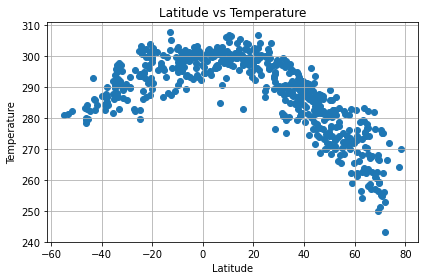

In [18]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

x_values= city_data_df["Lat"].astype ("float")
y_values= city_data_df["Max Temp"].astype ("float")
plt.scatter(x_values, y_values)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs Temperature")

plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

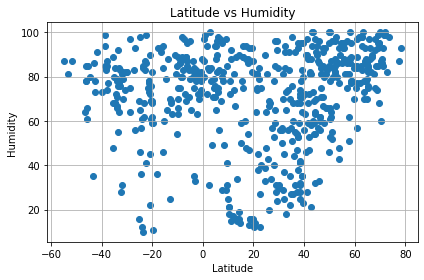

In [19]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values= city_data_df["Lat"].astype ("float")
y_values= city_data_df["Humidity"].astype ("float")
plt.scatter(x_values, y_values)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

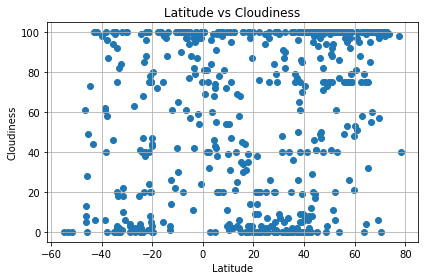

In [20]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values= city_data_df["Lat"].astype ("float")
y_values= city_data_df["Cloudiness"].astype ("float")
plt.scatter(x_values, y_values)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

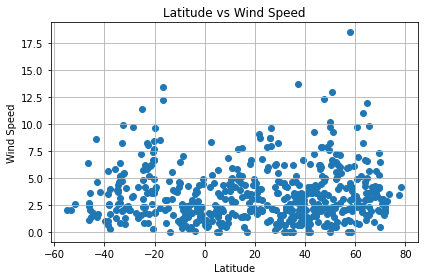

In [22]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values= city_data_df["Lat"].astype ("float")
y_values= city_data_df["Wind Speed"].astype ("float")
plt.scatter(x_values, y_values)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


Text(6, 10, 'y = 0.0x + 3.36')

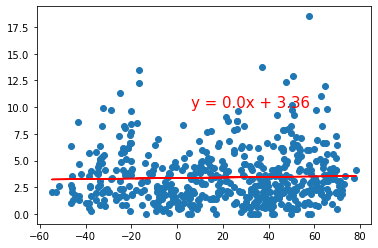

In [53]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) .astype(float)>= 0, :]
# Display sample data
northern_hemi_df                                    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,abu kamal,34.4506,40.9171,297.65,22,0,1.24,SY,1667640260
3,albany,42.6001,-73.9662,290.03,88,100,2.84,US,1667640264
4,bol,13.4586,14.7147,299.44,34,25,4.82,TD,1667640265
6,grindavik,63.8424,-22.4338,279.12,70,0,6.69,IS,1667640268
8,langham,52.3668,-106.9679,273.06,82,100,5.51,CA,1667640271
...,...,...,...,...,...,...,...,...,...
553,yaan,7.3833,8.5667,302.87,29,99,4.35,NG,1667641111
555,la ronge,55.1001,-105.2842,270.29,86,100,3.09,CA,1667645470
556,chernyshevskiy,63.0128,112.4714,262.45,94,100,2.44,RU,1667645472
557,kalmunai,7.4167,81.8167,299.96,80,99,1.92,LK,1667645473


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df= city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) .astype(float)<= 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,hobart,-42.8794,147.3294,286.07,86,100,4.63,AU,1667640017
2,rikitea,-23.1203,-134.9692,294.72,68,85,5.84,PF,1667640263
5,ushuaia,-54.8000,-68.3000,280.96,87,0,2.06,AR,1667640267
7,bluff,-46.6000,168.3333,283.11,64,61,6.35,NZ,1667640270
13,atuona,-9.8000,-139.0333,298.17,75,30,6.44,PF,1667640278


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.57x + 307.2
The r-squared is: -0.8746931294905107
The regression shows a negative correlation.
Nothern hemisphere :as we move away from the equator the temperature decreases.


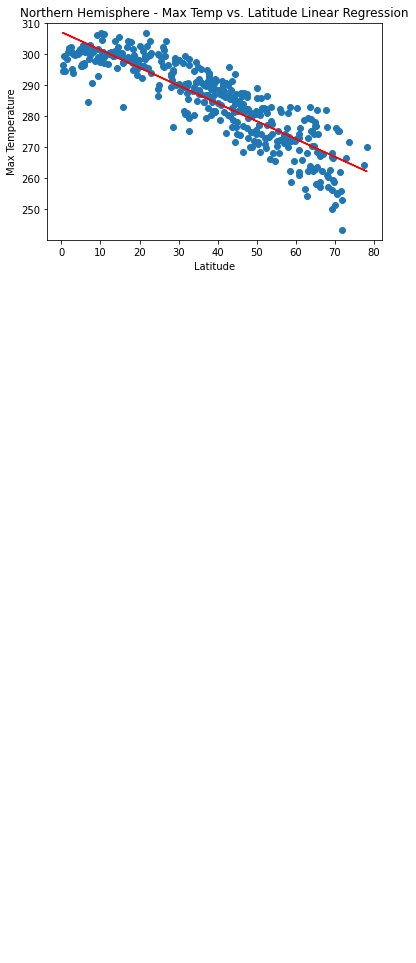

In [63]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values= pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values= pd.to_numeric(northern_hemi_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression shows a negative correlation.")
print("Nothern hemisphere :as we move away from the equator the temperature decreases.")
plt.show()


Regression line equation is: y = 0.34x + 301.24
The r-squared is: 0.6903308819357807
The regression displays a positive correlation.
Southern hemisphere : as we get closer to the equator the temperature increases.


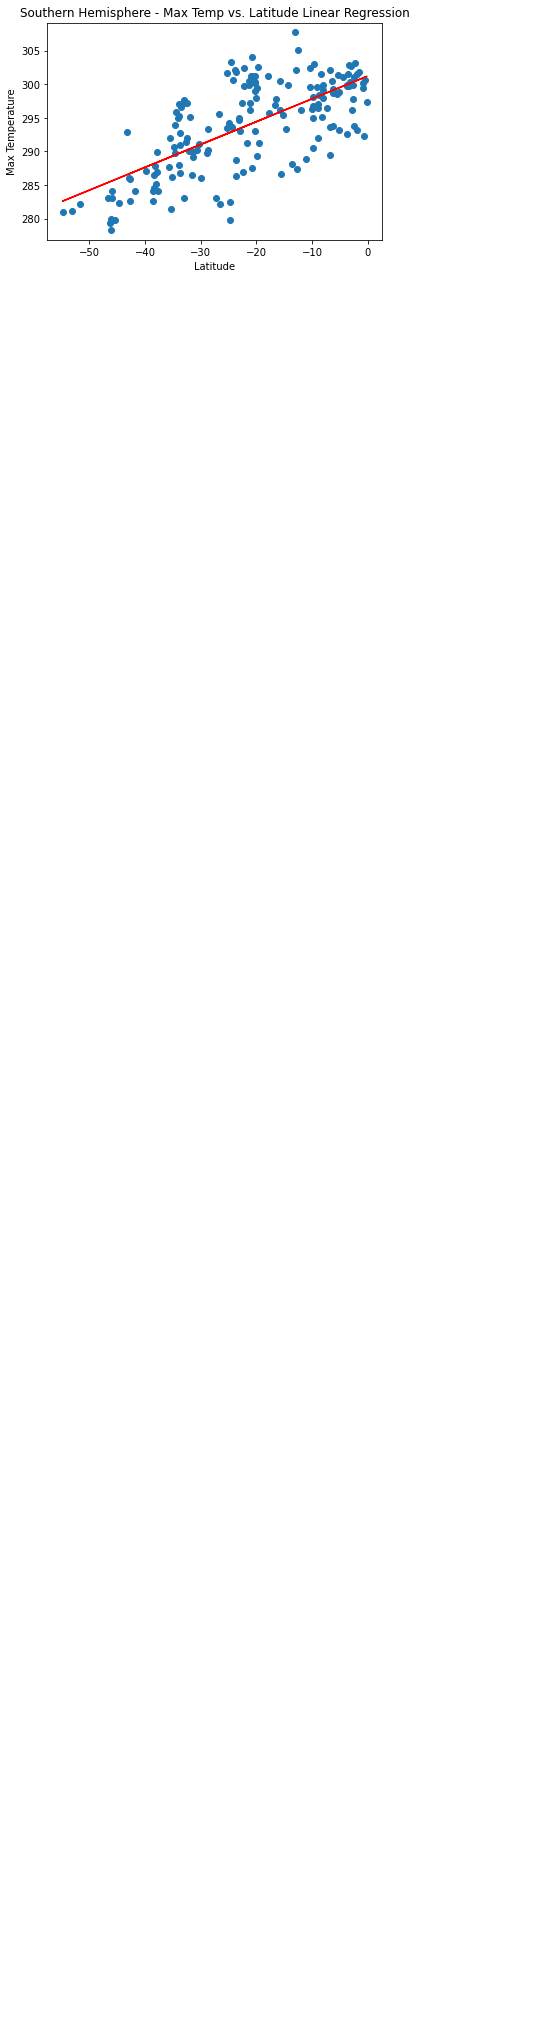

In [64]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values= pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values= pd.to_numeric(southern_hemi_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("Southern hemisphere : as we get closer to the equator the temperature increases.")
plt.show()

**Discussion about the linear relationship:** 
Northern Hemisphere:
The r-squared is: -0.8746931294905107
The regression shows a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.
Southern Hemisphere:
The r-squared is: 0.6903308819357807
The regression displays a positive correlation.
In the southern hemisphere, as we get closer to the equator the temperature increases.

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.37x + 56.11
The r-squared is: 0.3170833676921044
The regression does not display much of a correlation between the data sets.


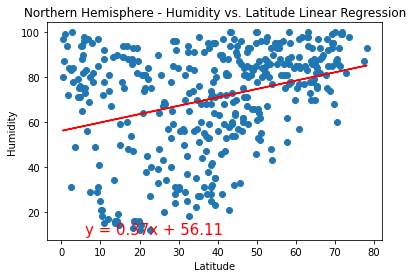

In [66]:
# Northern Hemisphere
# YOUR CODE HERE
x_values= pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values= pd.to_numeric(northern_hemi_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

Regression line equation is: y = 0.04x + 74.07
The r-squared is: 0.03424857091435284
The regression does not display much of a correlation between the data sets.


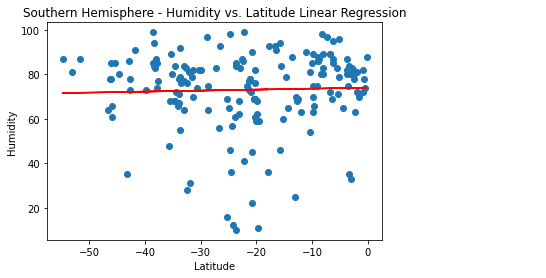

In [71]:
# Southern Hemisphere
# YOUR CODE HERE
x_values= pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values= pd.to_numeric(southern_hemi_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

**Discussion about the linear relationship:** The regressions does not display much of a correlation between the data sets.

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.65x + 35.19
The r-squared is: 0.3237778089671544
The regression does not display much of a correlation between the data sets.


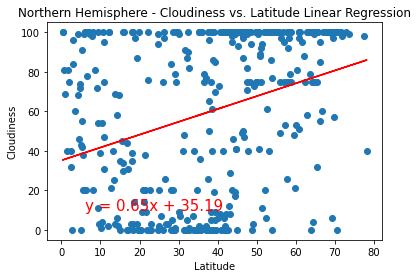

In [68]:
# Northern Hemisphere
# YOUR CODE HERE
x_values= pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values= pd.to_numeric(northern_hemi_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

Regression line equation is: y = 1.22x + 83.26
The r-squared is: 0.41757328590605386
The regression does not display much of a correlation between the data sets.


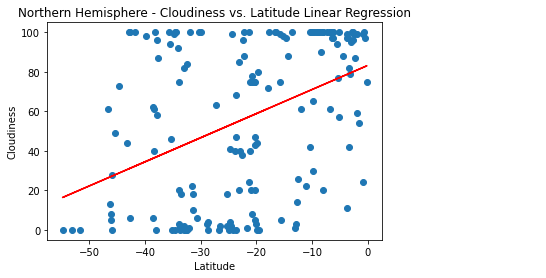

In [70]:
# Southern Hemisphere
# YOUR CODE HERE
x_values= pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values= pd.to_numeric(southern_hemi_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

**Discussion about the linear relationship:** The regressions does not display much of a correlation between the data sets

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.02x + 2.79
The r-squared is: 0.1253822543833228
The regression does not display much of a correlation between the data sets.


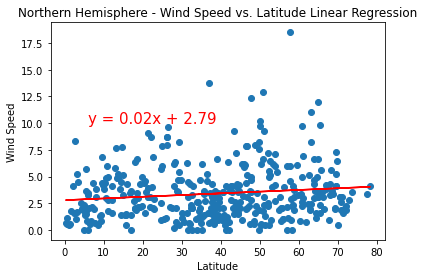

In [72]:
# Northern Hemisphere
# YOUR CODE HERE
x_values= pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values= pd.to_numeric(northern_hemi_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

Regression line equation is: y = -0.02x + 3.0
The r-squared is: -0.11244698849587592
The regression does not display much of a correlation between the data sets.


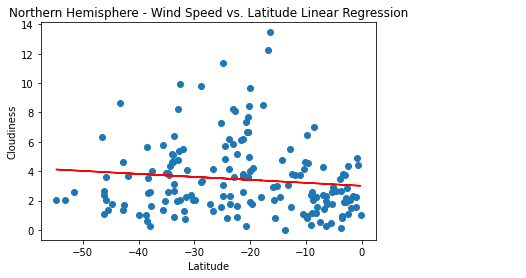

In [73]:
# Southern Hemisphere
# YOUR CODE HERE
x_values= pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values= pd.to_numeric(southern_hemi_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

**Discussion about the linear relationship:** The regressions does not display much of a correlation between the data sets.